### Assignment 1 b

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import time

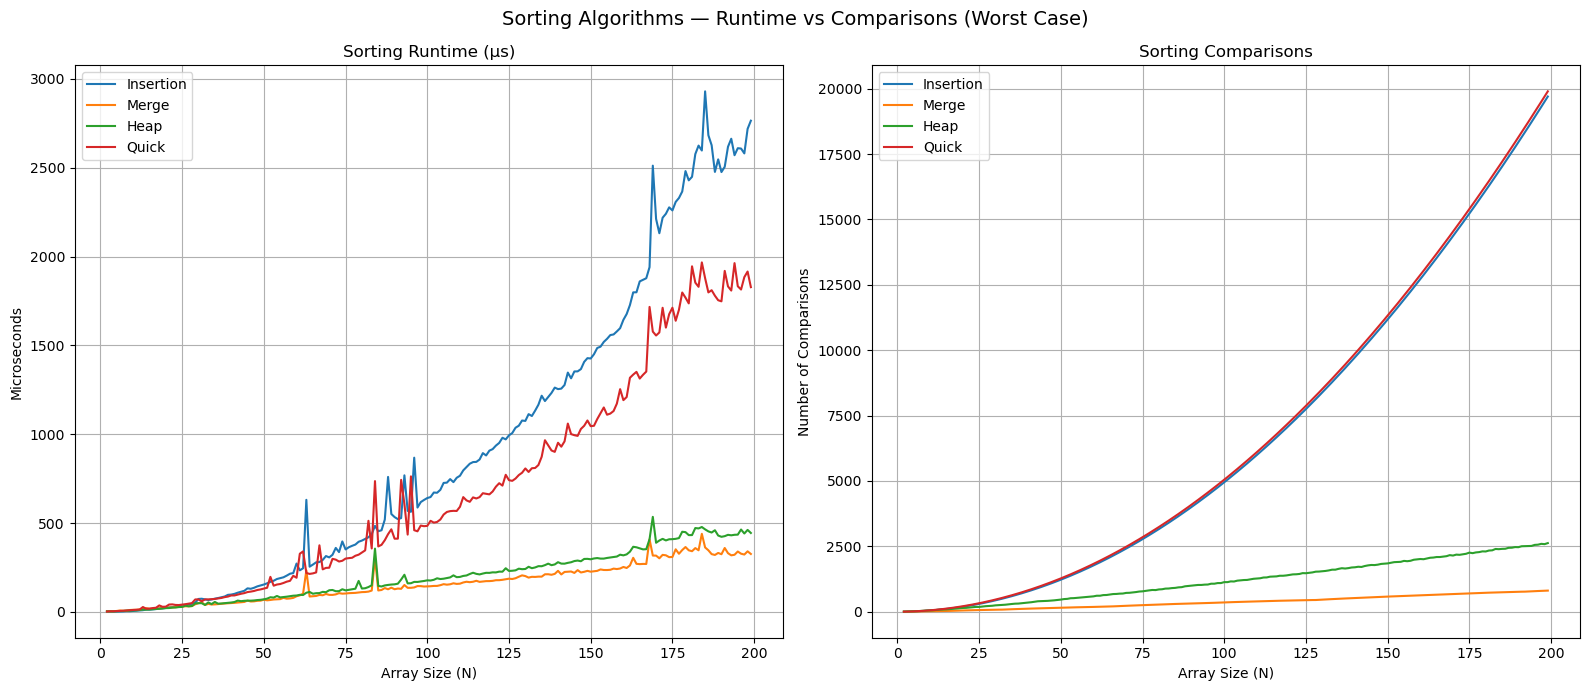

In [6]:
# Insertion Sort
def insertion_sort(arr, metadata=None):
    metadata = metadata or {}
    metadata['insertion_comparisons'] = metadata.get('insertion_comparisons', 0)
    metadata['insertion_swaps'] = metadata.get('insertion_swaps', 0)
    start = time.perf_counter_ns()
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0:
            metadata['insertion_comparisons'] += 1
            if arr[j] <= key:
                break
            arr[j + 1] = arr[j]
            metadata['insertion_swaps'] += 1
            j -= 1
        arr[j + 1] = key
    end = time.perf_counter_ns()
    metadata["insertion_us"] = (end - start) / 1_000
    return arr, metadata

# Merge Sort
def merge_sort(arr, metadata=None):
    metadata = metadata or {}
    metadata['merge_comparisons'] = metadata.get('merge_comparisons', 0)
    metadata['merge_swaps'] = metadata.get('merge_swaps', 0)
    start = time.perf_counter_ns()
    if len(arr) > 1:
        mid = len(arr) // 2
        L = arr[:mid]
        R = arr[mid:]

        merge_sort(L, metadata)
        merge_sort(R, metadata)

        i = j = k = 0

        while i < len(L) and j < len(R):
            metadata['merge_comparisons'] += 1
            if L[i] < R[j]:
                arr[k] = L[i]
                metadata['merge_swaps'] += 1
                i += 1
            else:
                arr[k] = R[j]
                metadata['merge_swaps'] += 1
                j += 1
            k += 1

        while i < len(L):
            arr[k] = L[i]
            metadata['merge_swaps'] += 1
            i += 1
            k += 1

        while j < len(R):
            arr[k] = R[j]
            metadata['merge_swaps'] += 1
            j += 1
            k += 1

    end = time.perf_counter_ns()
    metadata["merge_us"] = (end - start) / 1_000
    return arr, metadata

# Heap Sort
def heapify(arr, n, i, metadata=None):
    metadata = metadata or {}
    metadata['heap_comparisons'] = metadata.get('heap_comparisons', 0)
    metadata['heap_swaps'] = metadata.get('heap_swaps', 0)
    largest = i
    l = 2 * i + 1
    r = 2 * i + 2

    metadata['heap_comparisons'] += 1
    if l < n and arr[l] > arr[largest]:
        largest = l

    metadata['heap_comparisons'] += 1
    if r < n and arr[r] > arr[largest]:
        largest = r

    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        metadata['heap_swaps'] += 1
        heapify(arr, n, largest, metadata)

def heap_sort(arr, metadata=None):
    metadata = metadata or {}
    metadata['heap_comparisons'] = metadata.get('heap_comparisons', 0)
    metadata['heap_swaps'] = metadata.get('heap_swaps', 0)
    start = time.perf_counter_ns()
    n = len(arr)

    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i, metadata)

    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        metadata['heap_swaps'] += 1
        heapify(arr, i, 0, metadata)

    end = time.perf_counter_ns()
    metadata["heap_us"] = (end - start) / 1_000
    return arr, metadata

# Quick Sort
def quick_sort(arr, metadata=None):
    IS_FIRST_CALL = metadata is None
    metadata = metadata or {}
    metadata['quick_comparisons'] = metadata.get('quick_comparisons', 0)
    metadata['quick_swaps'] = metadata.get('quick_swaps', 0)
    start = time.perf_counter_ns()
    if len(arr) <= 1:
        return arr, None
    else:
        # Pivot at first element for worst case scenario
        pivot = arr[0]#arr[len(arr) // 2]
        idxFromLeft = None
        idxFromRight = None
        while idxFromLeft is None or idxFromLeft < idxFromRight:
            idxFromLeft = 1
            while idxFromLeft < len(arr):
                metadata['quick_comparisons'] += 1
                if arr[idxFromLeft] >= pivot:
                    break
                idxFromLeft += 1
            idxFromRight = len(arr) - 1
            while idxFromRight > 0:
                metadata['quick_comparisons'] += 1
                if arr[idxFromRight] <= pivot:
                    break
                idxFromRight -= 1
            if idxFromLeft < idxFromRight:
                arr[idxFromLeft], arr[idxFromRight] = arr[idxFromRight], arr[idxFromLeft]
                metadata['quick_swaps'] += 1
        arr[0], arr[idxFromRight] = arr[idxFromRight], arr[0]
        metadata['quick_swaps'] += 1
        left, _ = quick_sort(arr[:idxFromRight], metadata)
        right, _ = quick_sort(arr[idxFromRight + 1:], metadata)
        if IS_FIRST_CALL:
            end = time.perf_counter_ns()
            metadata["quick_us"] = (end - start) / 1_000

        return left + [arr[idxFromRight]] + right, metadata

# Run the sorting algorithms and collect data
N = list(range(2,200))

results_us = {
    'insertion': [],
    'merge': [],
    'heap': [],
    'quick': []
}

results_comp = {
    'insertion': [],
    'merge': [],
    'heap': [],
    'quick': []
}

for n in N:
    data = list(range(n))
    np.random.shuffle(data)
    data.sort(reverse=True)   # worst case

    for sort in [insertion_sort, merge_sort, heap_sort, quick_sort]:
        sorted_arr, metadata = sort(data.copy())

        key = list(metadata.keys())[0].split('_')[0]

        results_us[key].append(metadata[f'{key}_us'])
        results_comp[key].append(metadata[f'{key}_comparisons'])

        
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7), sharex=True)

# ---- Left: Runtime (μs) ----
for key in results_us:
    ax1.plot(N, results_us[key], label=key.capitalize())

ax1.set_title("Sorting Runtime (μs)")
ax1.set_xlabel("Array Size (N)")
ax1.set_ylabel("Microseconds")
ax1.legend()
ax1.grid(True)

# ---- Right: Comparisons ----
for key in results_comp:
    ax2.plot(N, results_comp[key], label=key.capitalize())

ax2.set_title("Sorting Comparisons")
ax2.set_xlabel("Array Size (N)")
ax2.set_ylabel("Number of Comparisons")
ax2.legend()
ax2.grid(True)


plt.suptitle("Sorting Algorithms — Runtime vs Comparisons (Worst Case)", fontsize=14)
plt.tight_layout()
plt.show()

We see that Insertion sort is slow, Merge sort is fast. The execution time of Insertion sort approaches 3000 microseconds at $n=200$.

In [10]:
def estimate_complexity(N:list, ops:list):
    common_complexities = {
        'T(n)': lambda n: n,
        'T(n log n)': lambda n: n * np.log2(n),
        'T(n^2)': lambda n: n**2,
        'T(log n)': lambda n: np.log2(n),
    }
    estimates = {}
    for name, func in common_complexities.items():
        estimated_ops = [func(n) for n in N]
        scaling_factor = np.mean([a / b for a, b in zip(ops, estimated_ops)])
        estimated_ops = [scaling_factor * e for e in estimated_ops]
        error = np.mean([(a - b) ** 2 for a, b in zip(ops, estimated_ops)])
        estimates[name] = error
    estimates = {k: round(np.log(v), 1) for k, v in estimates.items()}
    best_fit = min(estimates, key=estimates.get)
    return best_fit, estimates

for key, values in results_comp.items():
    best_fit, estimates = estimate_complexity(N, values)
    print(f'{key.capitalize()} Sort is {best_fit}')

Insertion Sort is T(n^2)
Merge Sort is T(n log n)
Heap Sort is T(n log n)
Quick Sort is T(n^2)


# DotNet results:

Insertion Sort is T(n^2)
- errors: {'T(n)': np.float64(5.8), 'T(n log n)': np.float64(5.6), 'T(n^2)': np.float64(3.8), 'T(log n)': np.float64(6.4)}

Merge Sort is T(n log n)
- errors: {'T(n)': np.float64(3.2), 'T(n log n)': np.float64(2.5), 'T(n^2)': np.float64(6.5), 'T(log n)': np.float64(4.8)}

Heap Sort is T(n log n)
- errors: {'T(n)': np.float64(2.9), 'T(n log n)': np.float64(1.6), 'T(n^2)': np.float64(5.0), 'T(log n)': np.float64(4.4)}

Quick Sort is T(n^2)
- errors: {'T(n)': np.float64(4.9), 'T(n log n)': np.float64(4.6), 'T(n^2)': np.float64(1.3), 'T(log n)': np.float64(5.7)}



Text(0.5, 1.0, 'Sorting Algorithm Comparisons')

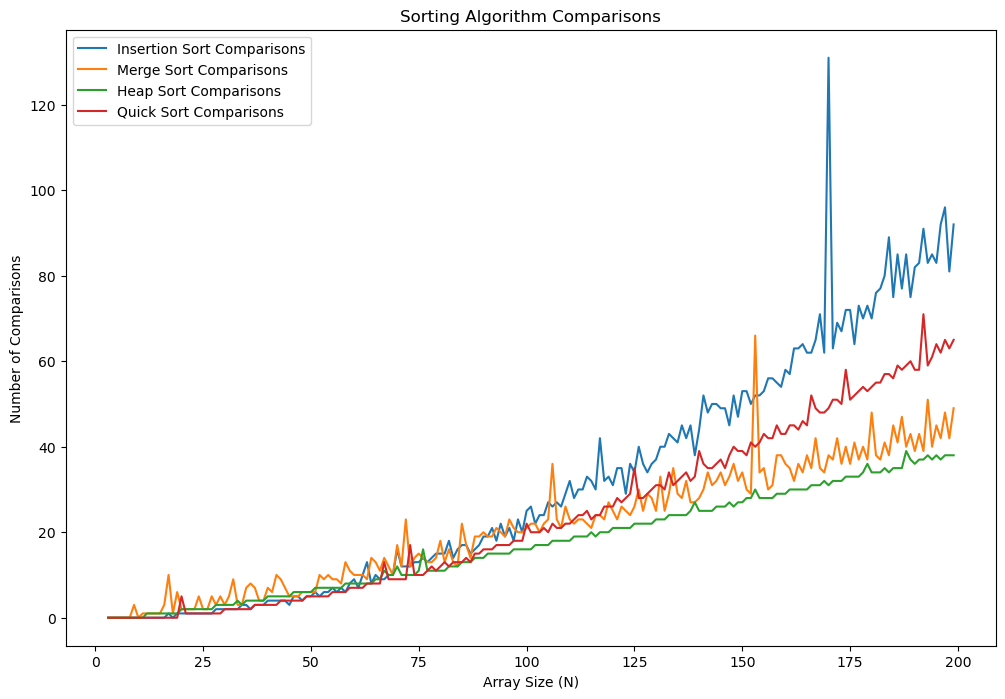

In [17]:
import pandas as pd
print("# DotNet results:\n")
df = pd.read_csv('DotnetComparison/sorting_microseconds.csv')

plt.figure(figsize=(12, 8))
for key in df.columns:
    if key == 'N':
        continue
    # Skipping the first row since the initialization time messes up the results
    N = df.loc[1:,'N']
    values = df.loc[1:,key]
    
    best_fit, estimates = estimate_complexity(N, values)
    print(f'{key.capitalize()} Sort is {best_fit}\n- errors: {estimates}\n')

    plt.plot(N, values, label=f'{key.capitalize()} Sort Comparisons')
plt.legend()
plt.xlabel('Array Size (N)')
plt.ylabel('Number of Comparisons')
plt.title('Sorting Algorithm Comparisons')

### Task 3 


## Small-o proof: o(g(n))

## Intuition: strictly upper bound

We have:

$f(n) = o(g(n)) \iff f(n) = o(g(n))$,  

$f(n) = o(g(n)) \iff \forall c > 0, \, \exists n_0 \ge 1 \text{ such that } f(n) < c \cdot g(n) \text{ for all } n \ge n_0$,  

$\iff \lim_{n \to \infty} \frac{g(n)}{f(n)} = \infty$,  

$\iff \lim_{n \to \infty} \frac{f(n)}{g(n)} = 0$.


We want to show that $\frac{n^2}{\log n} = o(n^2)$ as $n \to \infty$.  

By definition of little-o, $f(n) = o(g(n))$ means $\lim_{n \to \infty} \frac{f(n)}{g(n)} = 0$.  

Here, $f(n) = \frac{n^2}{\log n}$ and $g(n) = n^2$, so:

$\lim_{n \to \infty} \frac{f(n)}{g(n)} = \lim_{n \to \infty} \frac{\frac{n^2}{\log n}}{n^2} = \lim_{n \to \infty} \frac{1}{\log n} = 0.$  

This proves that $\frac{n^2}{\log n} = o(n^2)$.  


### Task 3b

We want to check if $n^2 = o(n^2)$.  

Here, let $f(n) = n^2$ and $g(n) = n^2$. Then:

$$
\lim_{n \to \infty} \frac{f(n)}{g(n)} = \lim_{n \to \infty} \frac{n^2}{n^2} = \lim_{n \to \infty} 1 = 1 \neq 0
$$

Since the limit is **not 0**, we conclude that:

$$
n^2 \neq o(n^2)
$$
